In [1]:
import site
site.addsitedir("./illustris_python/")

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import illustris_python.groupcat as gc
import matplotlib as mpl
from tqdm.notebook import tqdm

%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)
mpl.rcParams.update({'figure.autolayout': False})

In [2]:
#--------- Define constants
BoxSize = 300.0 #Mpc
hubble = 0.6774
resolution = '256'

#--------- Reading Positions
pos = np.loadtxt('summary_subhalo_pos_TNG300-1.dat')/hubble/1000
print(np.shape(pos))

(10850, 3)


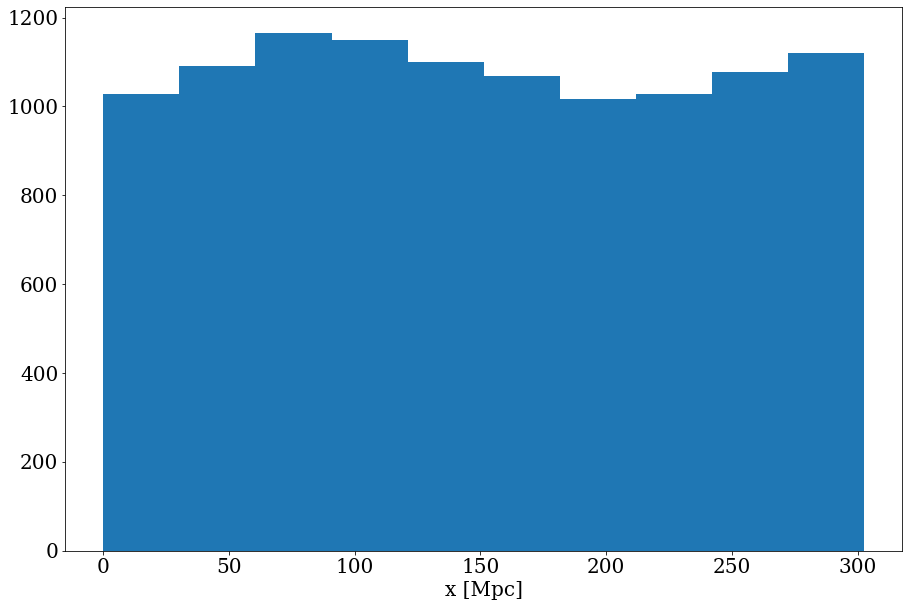

In [3]:
fig = plt.figure(figsize=(15,10))
_ = plt.hist(pos.T[0])
plt.xlabel('x [Mpc]')
plt.show()

In [4]:
#----------- x,y,z positions of the galaxies
x = pos.T[0]
y = pos.T[1]
z = pos.T[2]
x = x*BoxSize/max(x)
y = y*BoxSize/max(y)
z = z*BoxSize/max(z)
x[x<0] = 0
y[y<0] = 0
z[z<0] = 0

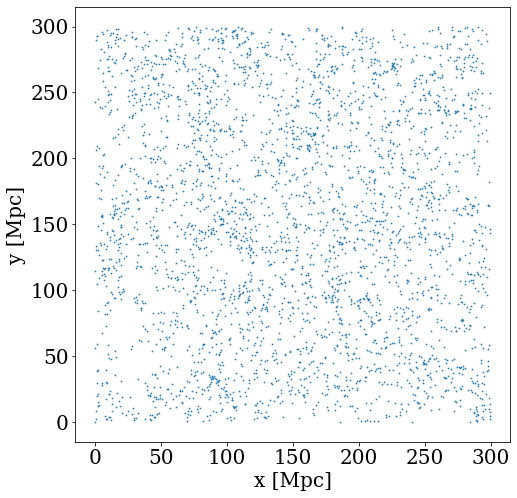

In [5]:
zlim=100
kk = z<zlim
fig=plt.figure(figsize=(8,8))
plt.scatter(x[kk], y[kk], s=0.5)
plt.axis('square')
plt.xlabel("x [Mpc]")
plt.ylabel("y [Mpc]")

plt.show()

In [6]:
smooth=[1]

lambda1_halo = []
lambda2_halo = []
lambda3_halo = []

pbar = tqdm(total=len(smooth))
for ss in smooth:
    filename = 'WEB_CIC_{}_DM_TNG300-2_sm{}.hdf5'.format(resolution,ss)
    print(filename)
    f = h5py.File(filename, 'r')
#         print(f.keys())
    density_smooth = f['density_smooth'][:,:,:]
    lambda1 = f['lambda1'][:,:,:]
    lambda2 = f['lambda2'][:,:,:]
    lambda3 = f['lambda3'][:,:,:]
    f.close()

    delta_box = BoxSize/(lambda1.shape[0]-0.5)

    ii_box = (x//delta_box).astype(int)
    jj_box = (y//delta_box).astype(int)
    kk_box = (z//delta_box).astype(int)

    density = density_smooth[ii_box, jj_box, kk_box]
    lambda1_halo = lambda1[ii_box, jj_box, kk_box]
    lambda2_halo = lambda2[ii_box, jj_box, kk_box]
    lambda3_halo = lambda3[ii_box, jj_box, kk_box]
    pbar.update()
pbar.close()

  0%|          | 0/1 [00:00<?, ?it/s]

WEB_CIC_256_DM_TNG300-2_sm1.hdf5


In [7]:
np.savetxt('summay_subhalo_lambdas_TNG300-2.dat', np.array([lambda1_halo,lambda2_halo,lambda3_halo]).T, delimiter=' ')

In [8]:
data = np.loadtxt('summay_subhalo_lambdas_TNG300-2.dat', delimiter=' ')
np.shape(data)

(10850, 3)

In [9]:
np.shape(pos)

(10850, 3)